In [1]:
s = poly(0, 's', 'r')
h = 1

 s  = 
  s
 h  = 
   1.


In [2]:
Tkr = 12.8
Kkr = 1.18
Ti = Tkr / 2
Td = Ti / 4
Tc = Td / 8
T0 = 1.17
n = 6
w1 = (1 + 1 / (Ti*s) + Td * s / (1 + Tc * s)) * (1.18 * 0.45 + 0.068) * (2/(1 + T0 * s)^n)
w = w1 / (1 + w1)

 Tkr  = 
   12.8
 Kkr  = 
   1.18
 Ti  = 
   6.4
 Td  = 
   1.6
 Tc  = 
   0.2
 T0  = 
   1.17
 n  = 
   6.
 w1  = 
                                     1.198 +7.9068s +13.80096s^2                                    
   -----------------------------------------------------------------------------------------------  
   6.4s +46.208s^2 +140.4s^3 +231.28934s^4 +220.89446s^5 +120.16864s^6 +33.255052s^7 +3.2834102s^8  
 w  = 
                                       0.3648661 +2.4081156s +4.2032397s^2                                       
   ------------------------------------------------------------------------------------------------------------  
   0.364866 +4.357318s +18.276463s^2 +42.760529s^3 +70.441928s^4 +67.276001s^5 +36.598751s^6 +10.128207s^7 +s^8  


In [5]:
numer = coeff(w.num)
denom = coeff(w.den)
denom = denom(1:length(denom) - 1);
numer = [numer zeros(1, length(denom) - length(numer))]

 numer  = 
   0.3648661   2.4081156   4.2032397
 denom  = 
   0.364866   4.357318   18.276463   42.760529   70.441928   67.276001   36.598751   10.128207   1.
 numer  = 
   0.3648661   2.4081156   4.2032397   0.   0.   0.   0.   0.


In [6]:
A1 = [zeros(1, length(denom) - 1); eye(length(denom) - 1, length(denom) - 1)];
A1 = [A1 -denom']
B1 = numer'
C1 = [zeros(1, length(denom) - 1) 1]

 A1  = 
   0.   0.   0.   0.   0.   0.   0.  -0.364866 
   1.   0.   0.   0.   0.   0.   0.  -4.357318 
   0.   1.   0.   0.   0.   0.   0.  -18.276463
   0.   0.   1.   0.   0.   0.   0.  -42.760529
   0.   0.   0.   1.   0.   0.   0.  -70.441928
   0.   0.   0.   0.   1.   0.   0.  -67.276001
   0.   0.   0.   0.   0.   1.   0.  -36.598751
   0.   0.   0.   0.   0.   0.   1.  -10.128207
 B1  = 
   0.3648661
   2.4081156
   4.2032397
   0.
   0.
   0.
   0.
   0.
 C1  = 
   0.   0.   0.   0.   0.   0.   0.   1.


In [7]:
// Ad1 = (A * h + eye(A))
Ad1 = expm(A1*h)
Sh = inv(A1)*(eye(A1)-expm(-A1*h))
Bd1 = expm(A1*h)*Sh*B1

 Ad1  = 
   0.9999968  -0.0000225  -0.0001327  -0.0006299  -0.0022121  -0.0046974  -0.0011478   0.017974 
   0.9999615   0.9997286  -0.0016073  -0.0076554  -0.0270479  -0.0583094  -0.018405    0.2135025
   0.4998352   0.9988365   0.993081   -0.0331606  -0.1184638  -0.2623437  -0.1158049   0.8819306
   0.166272    0.4972031   0.9832835   0.9192574  -0.2924135  -0.6689736  -0.3968633   1.9906652
   0.0410016   0.161936    0.4715819   0.8616695   0.4921749  -1.1993007  -0.8905756   3.0732487
   0.0076631   0.0368604   0.1374663   0.3554336   0.4537817  -0.3739533  -1.410943    2.4235764
   0.0009872   0.0054103   0.0235487   0.0742806   0.133539   -0.0173999  -0.4890887   0.3919856
   0.0000616   0.0003637   0.0017264   0.0060629   0.0128743   0.0031459  -0.049262    0.0098473
 Sh  = 
   0.9999969   0.0000315  -0.000296    0.0025398  -0.019846    0.1410737  -0.9146053   5.4509687
  -0.5000364   1.0003731  -0.003503    0.0300344  -0.2344658   1.6648908  -10.781365   64.18219 
   0.1665159 

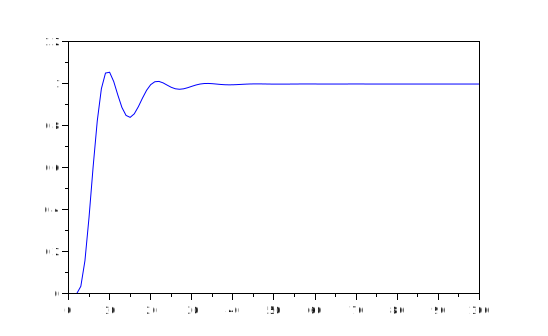

In [15]:
hd1 = [];
// adk1 = eye(Ad1);
// for k=1:100 
//     hd1 = [hd1; C1 * adk1 * B1];
//     adk1 = adk1 * Ad1;
// end;
v = zeros(Bd1);
for k=1:100
    hd1 = [hd1; C1 * v];
    v = Ad1 * v + Bd1;
end;
plot(hd1)

In [9]:
sys = syslin('c', w);
sysd = dscr(sys, h);
Ad2 = sysd.A
Bd2 = sysd.B
Cd2 = sysd.C

 Ad2  = 
   1.1886774   0.3927131  -0.1424513  -0.0774013  -0.051922   -0.0301443  -0.0001962   0.0000007
  -0.0933285   1.1145721  -0.7855475  -0.5975931  -0.4875615  -0.3148532  -0.0027345   0.0000128
   0.2187694   0.3828655   0.6104965   0.9834196   1.1226246   0.8554408   0.0120602  -0.0000759
   0.244259    0.3501539  -0.6297679  -0.3811835  -0.0712062   0.1010054   0.0122047  -0.0001283
   0.0222299   0.0516183  -0.1100631  -0.3526318  -0.4889657  -0.3941166   0.0001311  -0.0000607
  -0.0268651  -0.0345263   0.0484428   0.0758863   0.0489869   0.0098485  -0.001621    0.0000023
   0.032872    0.2535136   0.4421642   0.0502591   0.0213064  -0.010303    0.7957312  -0.017736 
   0.1601644   0.081207   -0.1567063  -0.0878009  -0.0489301  -0.023159    0.2766437   0.7018676
 Bd2  = 
  -0.0164045
  -0.2307345
   1.0344571
   1.0924888
   0.0662209
  -0.1301034
  -0.0580765
   0.0067661
 Cd2  = 
  -0.1024255  -3.469D-18  -8.674D-19   2.168D-19   4.066D-20   0.   3.469D-18   0.


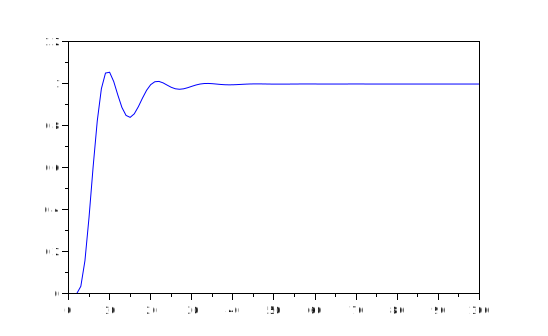

In [10]:
hd2 = [];
// adk2 = eye(Ad2);
// for k=1:100 
//     hd2 = [hd2; C2*adk2*B2];
//     adk2 = adk2 * Ad2;
// end;
v = zeros(Bd2);
for k=1:100
    hd2 = [hd2; Cd2 * v];
    v = Ad2 * v + Bd2;
end;
plot(hd2)

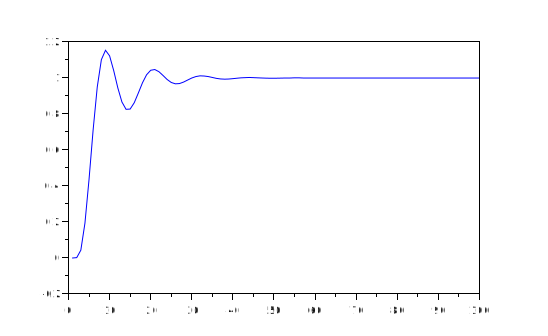

In [11]:
hh = [
  -4.106E-10
   2.098E-03
   4.335E-02
   1.936E-01
   4.376E-01
   7.136E-01
   9.507E-01
   1.102E+00
   1.154E+00
   1.123E+00
   1.041E+00
   9.451E-01
   8.666E-01
   8.261E-01
   8.274E-01
   8.628E-01
   9.171E-01
   9.735E-01
   1.018E+00
   1.043E+00
   1.047E+00
   1.035E+00
   1.014E+00
   9.917E-01
   9.752E-01
   9.677E-01
   9.691E-01
   9.774E-01
   9.888E-01
   1.000E+00
   1.008E+00
   1.012E+00
   1.011E+00
   1.008E+00
   1.003E+00
   9.979E-01
   9.947E-01
   9.935E-01
   9.943E-01
   9.964E-01
   9.988E-01
   1.001E+00
   1.002E+00
   1.003E+00
   1.002E+00
   1.001E+00
   1.000E+00
   9.992E-01
   9.987E-01
   9.986E-01
   9.990E-01
   9.995E-01
   1.000E+00
   1.000E+00
   1.001E+00
   1.001E+00
   1.000E+00
   1.000E+00
   9.999E-01
   9.997E-01
   9.997E-01
   9.997E-01
   9.999E-01
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   9.999E-01
   9.999E-01
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   1.000E+00
   9.998E-01
   9.997E-01
   9.997E-01
   9.997E-01
   9.997E-01
   9.998E-01
   9.998E-01
   9.999E-01
   9.999E-01
   9.999E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.998E-01
   9.999E-01
   9.999E-01
   1.000E+00
   1.000E+00
];
plot(hh)


 ans  =
   0.          1.          2.       
  -4.106D-10   0.          0.       
   0.002098    0.0016802   0.0016802
   0.04335     0.0366623   0.0366623
   0.1936      0.1586653   0.1586653
   0.4376      0.3659462   0.3659462
   0.7136      0.6073198   0.6073198
   0.9507      0.8244874   0.8244874
   1.102       0.9775395   0.9775395
   1.154       1.0520487   1.0520487
   1.123       1.0559927   1.0559927
   1.041       1.0119011   1.0119011
   0.9451      0.9476128   0.9476128
   0.8666      0.8881584   0.8881584
   0.8261      0.8504124   0.8504124
   0.8274      0.8411091   0.8411091
   0.8628      0.8578483   0.8578483
   0.9171      0.8920803   0.8920803
   0.9735      0.9328306   0.9328306
   1.018       0.9700598   0.9700598
   1.043       0.9969284   0.9969284
   1.047       1.0106902   1.0106902
   1.035       1.0123472   1.0123472
   1.014       1.0054683   1.0054683
   0.9917      0.9946771   0.9946771
   0.9752      0.984264    0.984264 
   0.9677      0.9772344   0.9

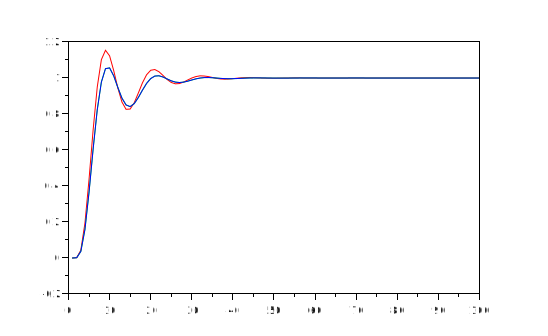

In [16]:
[0 1 2;hh hd1 hd2]
plot(hh, "r")
plot(hd1, "g")
plot(hd2, "b")